<a href="https://colab.research.google.com/github/NidhiChaurasia/LGMVIP-DataScience/blob/main/VGG19Model_(CIFAR100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

Extract data and train and test dataset

In [3]:
cifar100 = tf.keras.datasets.cifar100
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Let's look into the dataset images

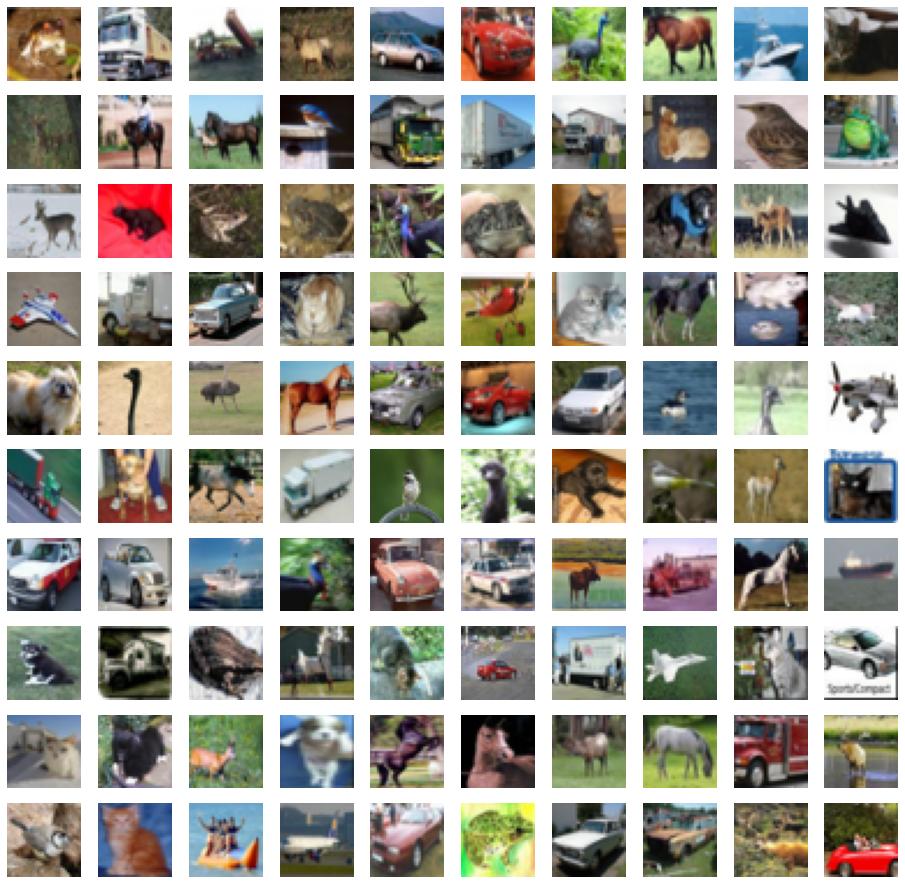

In [5]:
plt.figure(figsize = (16,16))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

Training , Validating and Splitting trained and tested data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train,test_size=0.2)

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
train_datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)
train_datagen.fit(x_train)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)
val_datagen.fit(x_val)

In [10]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

We have used only 16 layers out of 19 layers in the CNN

In [11]:
vgg_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)

vgg_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [12]:
model = tf.keras.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 21,864,266
Trainable params: 21,864,266
Non-trainable params: 0
____________________________________________

In [13]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size = 128),
    validation_data = val_datagen.flow(x_val,y_val, batch_size = 128),
    epochs = 25,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/25
313/313 [==============================] - 84s 165ms/step - loss: 1.6671 - accuracy: 0.3875 - val_loss: 1.1241 - val_accuracy: 0.6056
Epoch 2/25
313/313 [==============================] - 50s 159ms/step - loss: 0.9631 - accuracy: 0.6640 - val_loss: 0.7466 - val_accuracy: 0.7404
Epoch 3/25
313/313 [==============================] - 50s 160ms/step - loss: 0.7464 - accuracy: 0.7430 - val_loss: 0.6792 - val_accuracy: 0.7716
Epoch 4/25
313/313 [==============================] - 50s 160ms/step - loss: 0.6533 - accuracy: 0.7782 - val_loss: 0.6814 - val_accuracy: 0.7829
Epoch 5/25
313/313 [==============================] - 50s 159ms/step - loss: 0.5779 - accuracy: 0.8013 - val_loss: 0.5932 - val_accuracy: 0.8058
Epoch 6/25
313/313 [==============================] - 50s 160ms/step - loss: 0.5369 - accuracy: 0.8136 - val_loss: 0.5455 - val_accuracy: 0.8157
Epoch 7/25
313/313 [==============================] - 50s 160ms/step - loss: 0.4925 - accuracy: 0.8299 - val_loss: 0.5119 - val_ac

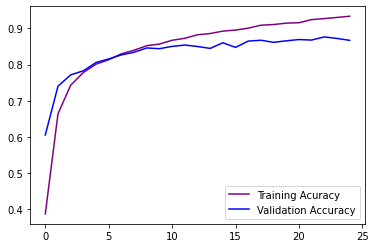

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

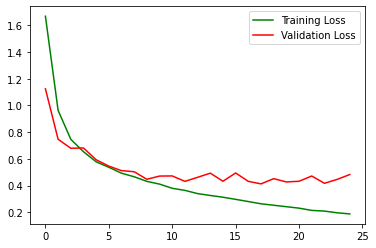

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [17]:
x_test = tf.keras.applications.vgg19.preprocess_input(X_test)
y_pred = model.predict_classes(x_test)
y_pred[:10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Testing Accuarcy : ', accuracy_score(Y_test, y_pred))

Testing Accuarcy :  0.8591


In [19]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[882,  11,  20,   1,  12,   1,   5,   9,  43,  16],
       [  5, 944,   0,   2,   0,   1,   2,   0,   8,  38],
       [ 22,   3, 800,  11,  54,  30,  56,   9,  10,   5],
       [ 10,   7,  42, 536,  57, 228,  74,  26,   6,  14],
       [  6,   1,  22,   5, 884,  20,  35,  23,   2,   2],
       [  5,   4,   9,  54,  36, 845,  19,  26,   0,   2],
       [  5,   1,  11,   7,  16,  10, 941,   3,   3,   3],
       [  4,   1,  12,   7,  31,  28,   8, 902,   2,   5],
       [ 25,  16,   1,   1,   4,   0,   4,   1, 929,  19],
       [  6,  41,   1,   2,   4,   0,   6,   2,  10, 928]])

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


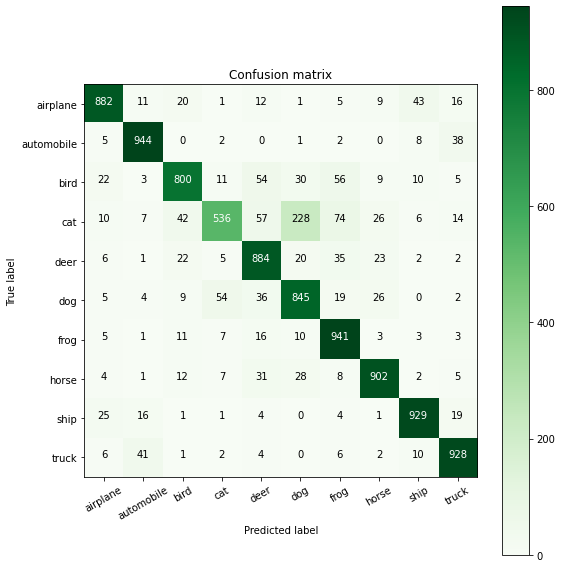

In [25]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm,classes)